# Base de dados Análise de Crédit

* Fonte (adaptado): https://www.kaggle.com/datasets/laotse/credit-risk-dataset

Importação das bibliotecas para trabalhar com dados e para visualização

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Importação de dados

In [3]:
# le o dataset em formato csv e carrega em um dataframe pandas
credit_data = pd.read_csv('credit_risk.csv')
credit_data.shape # função para verificar o tamanho do dataframe

(2000, 5)

In [4]:
credit_data #imprime o dataframe inteiro na saída do colab

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [5]:
credit_data['age'] #acessar colunas

0       59.017015
1       48.117153
2       63.108049
3       45.751972
4       18.584336
          ...    
1995    48.518179
1996    23.162104
1997    28.017167
1998    63.971796
1999    56.152617
Name: age, Length: 2000, dtype: float64

In [6]:
# exemplo de um dataframe com indice nas rows diferente de 0, 1, 2,...
dict = {
    'A': [1, 2, 3], 
    'B': [4, 5, 6]
}
df = pd.DataFrame(dict, index=['a', 'b', 'c'])
df

,A,B
a,1,4
b,2,5
c,3,6


In [7]:
# apresenta os primeiros registros do dataframe, o parametro indica o número, valor default é 5
credit_data.head(3)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0


In [8]:
# apresenta os últimos registros do dataframe, o parametro indica o número, valor default é 5
credit_data.tail(3)

,clientid,income,age,loan,default
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [9]:
# describe apresenta dados estatísticos sobre cada coluna do dataframe
credit_data.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [10]:
# apresenta quais os valores únicos na coluna alvo/rótulo/classe e apresenta a contagem de cada classe
np.unique(credit_data['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

# Visualização dos dados

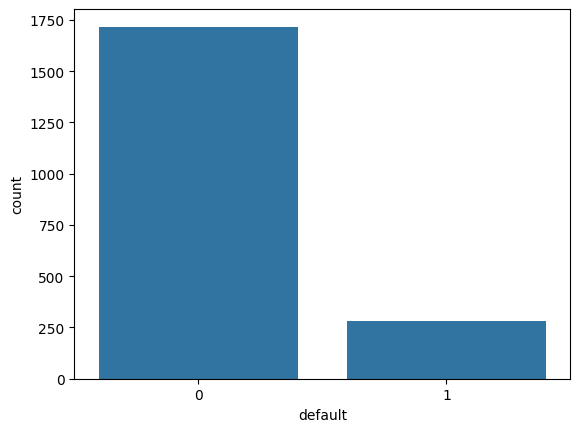

In [11]:
# imprime a quantidade de valores em cada uma das classes
sns.countplot(x=credit_data['default']);

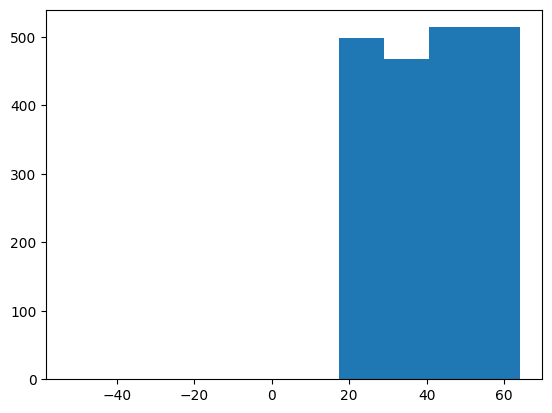

In [12]:
# gera um histograma da distribuição das idades das pessoas no dataset
plt.hist(x=credit_data['age']);

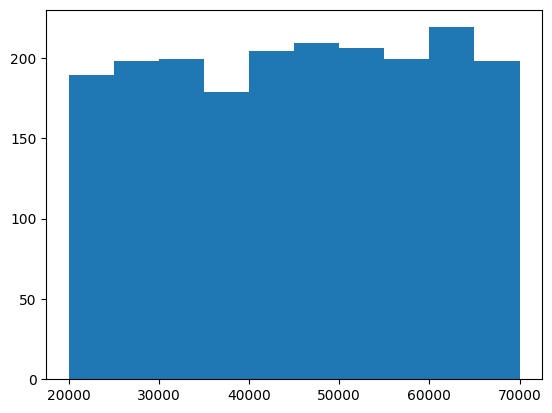

In [13]:
# gera um histograma da distribuição das rendas das pessoas no dataset
plt.hist(x=credit_data['income']);

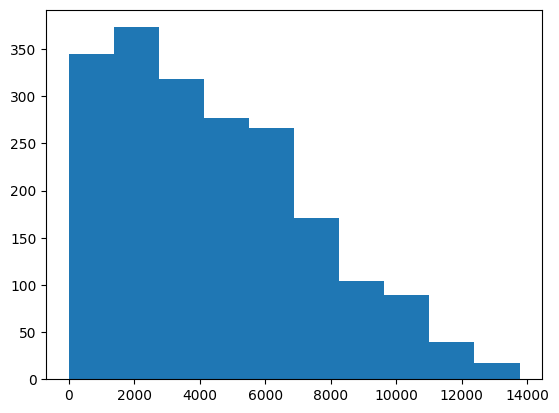

In [14]:
# gera um histograma da distribuição das dívidas/emprestimos das pessoas no dataset
plt.hist(x=credit_data['loan']);

In [15]:
# gera uma matriz de dispersão considerando a permutação de todas as dimensões envolvidas
# utiliza a cor para identificar as diferentes classes da coluna alvo
graph = px.scatter_matrix(credit_data, dimensions=['age', 'income', 'loan'], color='default')
graph.show()

In [16]:
# filtra os registros com pessoas que tem idade negativa
credit_data[credit_data['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


# Limpeza dos dados - valores inconsistents

In [17]:
# armazena em credit_data2 somentes os registros com idade maior que 0
credit_data2 = credit_data.loc[credit_data['age'] > 0]

In [18]:
# exclui a coluna age do dataset
credit_data3 = credit_data.drop('age', axis=1)
credit_data3

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


In [19]:
# exclui todos os registros que possui idade menor que 0
credit_data4 = credit_data.drop(credit_data[credit_data['age'] < 0].index)
credit_data4

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [20]:
# calcula a média das idades das pessoas do dataset
sample_mean_age = credit_data['age'].mean()
sample_mean_age

np.float64(40.80755937840458)

In [21]:
# recalculando a média desconsiderando as idades negativas
sample_mean_age = credit_data[credit_data['age'] > 0]['age'].mean()
sample_mean_age

np.float64(40.92770044906149)

In [22]:
# seta as idades negativas com o valor médio das idades
credit_data.loc[credit_data['age'] < 0, 'age'] = sample_mean_age

In [23]:
# filtra novamente os dados para verificar se realmente resolvemos o problema das idades negativas
credit_data[credit_data['age'] < 0]

,clientid,income,age,loan,default


In [24]:
# gera uma matriz de dispersão considerando a permutação de todas as dimensões envolvidas
# utiliza a cor para identificar as diferentes classes da coluna alvo
# imprime novamente agora sem os dados com idade negativa
graph = px.scatter_matrix(credit_data, dimensions=['age', 'income', 'loan'], color='default')
graph.show()

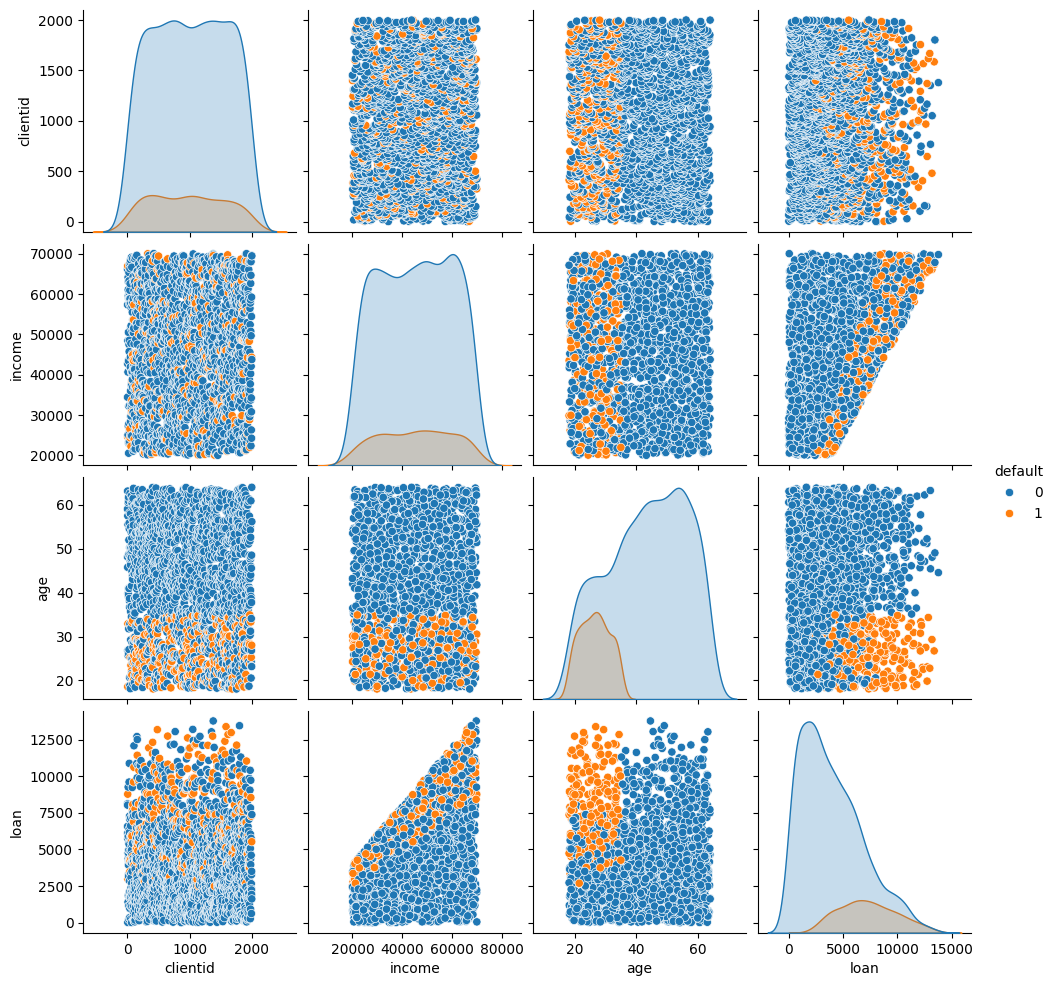

In [25]:
sns.pairplot(credit_data, hue='default')

# Limpeza dos dados - valores faltantes

In [26]:
# exibe a quantidade de valores faltantes (null ou NaN) para cada coluna
credit_data.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [27]:
# exibe os registros cuja idade esta faltando
credit_data.loc[pd.isnull(credit_data['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [28]:
# atualiza os valores faltando da idade com a média da idade
credit_data['age'].fillna(credit_data['age'].mean(), inplace=True)

/var/folders/0h/4_9cyl9d7g5_gsyw7cvrx0h80000gn/T/ipykernel_2943/1043940179.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [29]:
# exibe novamente os registros cuja idade é null para verificar se o problema está resolvido
credit_data.loc[pd.isnull(credit_data['age'])]

,clientid,income,age,loan,default


In [30]:
# filtra os registros para verificar o novo valor de idade inserido
credit_data[(credit_data['clientid'] == 29) | (credit_data['clientid'] == 31) | (credit_data['clientid'] == 32)]

,clientid,income,age,loan,default
28,29,59417.805406,40.9277,2082.625938,0
30,31,48528.852796,40.9277,6155.784670,0
31,32,23526.302555,40.9277,2862.010139,0


In [31]:
# mesma coisa da célula de cima, mas utilizando o método isin
credit_data[credit_data['clientid'].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.9277,2082.625938,0
30,31,48528.852796,40.9277,6155.784670,0
31,32,23526.302555,40.9277,2862.010139,0


# Divisão dos dados entre previsores e classe

In [32]:
# imprime o dataset
credit_data

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [33]:
# separa as colunas 1, 2 e 3 do dataframe e converte em um numpy array
X_credit = credit_data.iloc[:, 1:4].values
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [34]:
# exibe o tipo da variavel
type(X_credit)
type(credit_data)

pandas.core.frame.DataFrame

In [35]:
# separa a classe, ou seja, coluna 'default' do dataframe e salva em um array numpy
y_credit = credit_data.iloc[:, 4].values
y_credit
# type(y_credit)

array([0, 0, 0, ..., 1, 0, 0])

# Escalonamento dos valores

In [36]:
# exibe os valores mínimos de cada coluna/distribuição
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min()

(np.float64(20014.4894700497),
 np.float64(18.055188510566897),
 np.float64(1.37762959325451))

In [37]:
# exibe os valores máximos de cada coluna/distribuição
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max()

(np.float64(69995.6855783239),
 np.float64(63.971795841120205),
 np.float64(13766.0512393337))

In [38]:
# plotando as diferenças de grandezas
x = ['min', 'max']
y_income = [X_credit[:, 0].min(), X_credit[:, 0].max()]
y_age = [X_credit[:, 1].min(), X_credit[:, 1].max()]
y_loan = [X_credit[:, 2].min(), X_credit[:, 2].max()]

# imprime todos os valores
y_income, y_age, y_loan

([np.float64(20014.4894700497), np.float64(69995.6855783239)],
 [np.float64(18.055188510566897), np.float64(63.971795841120205)],
 [np.float64(1.37762959325451), np.float64(13766.0512393337)])

In [41]:
# não vai funcionar porque o X_credit não é mais um dataframe e sim um np array
# X_credit.describe()

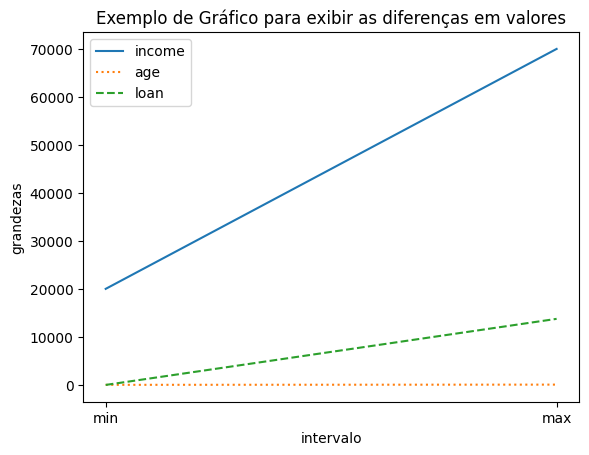

In [42]:
# gráfico para exibir a diferença entre grandezas
plt.plot(x, y_income, label='income', linestyle='solid')
plt.plot(x, y_age, label='age', linestyle='dotted')
plt.plot(x, y_loan, label='loan', linestyle='dashed')

plt.xlabel('intervalo')
plt.ylabel('grandezas')
plt.legend()
plt.title('Exemplo de Gráfico para exibir as diferenças em valores')
plt.show()

In [43]:
# importa o StandardScaler para padronização dos dados
from sklearn.preprocessing import StandardScaler

# instancia o objeto StandardScaler
scaler_credit = StandardScaler()
# padroniza cada uma das colunas do X_credit
X_credit = scaler_credit.fit_transform(X_credit)

In [44]:
X_credit

array([[ 1.45393393,  1.36538005,  1.20281942],
       [-0.76217555,  0.54265932,  0.69642695],
       [ 0.83682073,  1.67417101,  1.17471147],
       ...,
       [-0.07122592, -0.97448606,  0.35420081],
       [-0.11000289,  1.73936652, -0.92675625],
       [ 1.682986  ,  1.14917551,  0.96381038]])

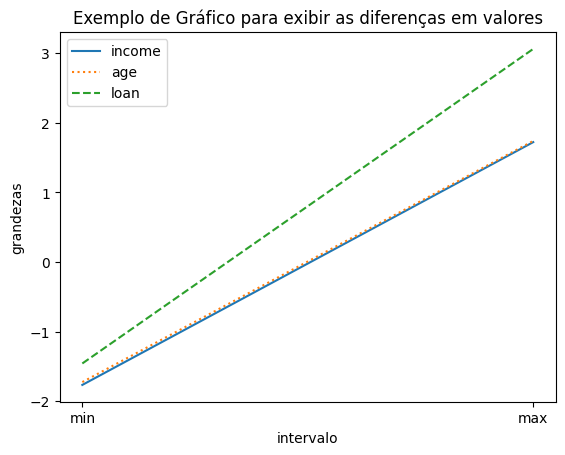

In [45]:
# plota novamente para verificar a diferença agora com os valores padronizados/normalizados
# plotando as diferenças de grandezas
x = ['min', 'max']
y_income = [X_credit[:, 0].min(), X_credit[:, 0].max()]
y_age = [X_credit[:, 1].min(), X_credit[:, 1].max()]
y_loan = [X_credit[:, 2].min(), X_credit[:, 2].max()]

# imprime todos os valores
# y_income, y_age, y_loan

plt.plot(x, y_income, label='income', linestyle='solid')
plt.plot(x, y_age, label='age', linestyle='dotted')
plt.plot(x, y_loan, label='loan', linestyle='dashed')

plt.xlabel('intervalo')
plt.ylabel('grandezas')
plt.legend()
plt.title('Exemplo de Gráfico para exibir as diferenças em valores')
plt.show()